### LIBRARIES

In [1]:
import itertools
import random
import shutil
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint

from tqdm import tqdm
import msgc

In [2]:
RANDOM_SEED = 42
tqdm.pandas()

### DATA

In [3]:
metadata = pd.read_csv("data/metadata.csv", index_col="sample_id")
train_files = metadata[metadata["split"] == "train"]["features_path"].to_dict()
val_files = metadata[metadata["split"] == "val"]["features_path"].to_dict()
test_files = metadata[metadata["split"] == "test"]["features_path"].to_dict()

### SPECTOGRAMS

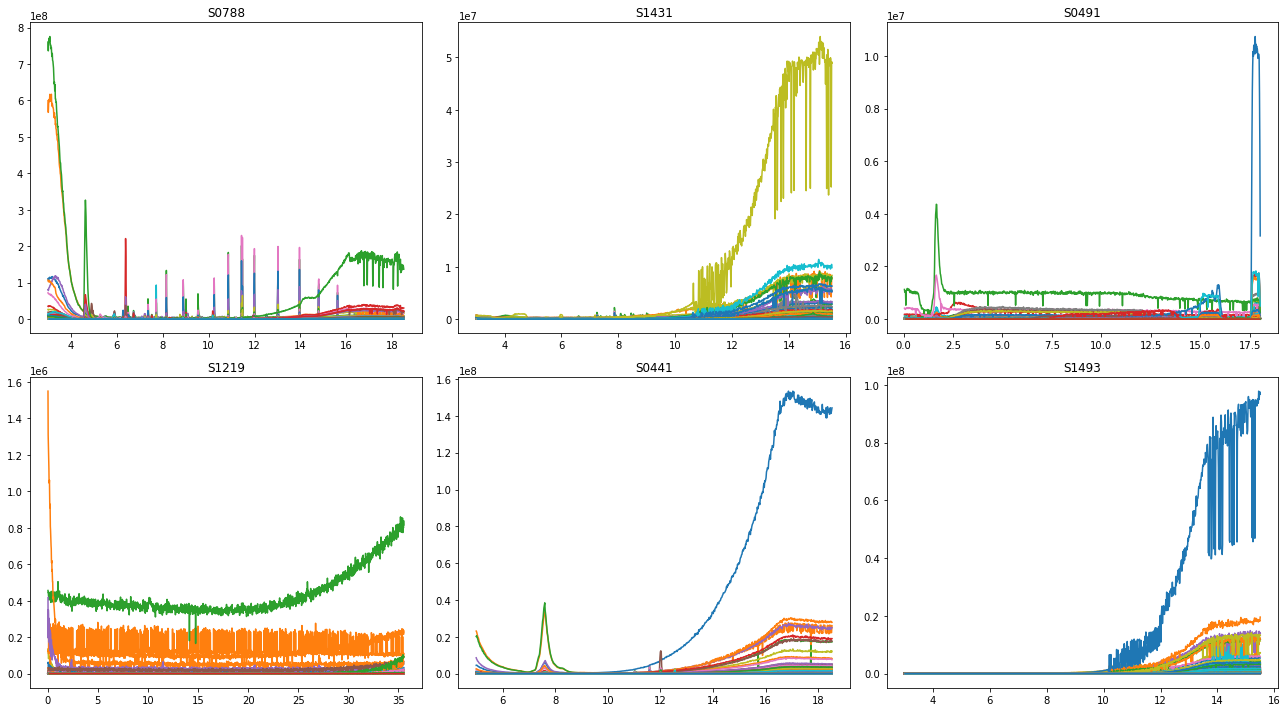

In [4]:
msgc.viz.grid_plot(metadata, msgc.viz.plot_spectrogram, random.sample(list(metadata.index), 6), cols=3)

### DATASET STATS

In [5]:
# Train sample.
sample_paths_ls = metadata.features_path
stats = pd.DataFrame(sample_paths_ls)
stats.columns = ["fpath"]

In [6]:
# (
#     stats["time_min"],
#     stats["time_max"],
#     stats["time_range"],
#     stats["mass_min"],
#     stats["mass_max"],
#     stats["mass_range"],
# ) = zip(*stats['fpath'].progress_apply(msgc.features.get_time_mass_stats))
# stats.describe()

### FEATURE ENGINEERING

In [7]:
train_features_dict = {}

# Assembling preprocessed and transformed training set.
for sample_id, filepath in tqdm(train_files.items()):
    # Load training sample.
    temp = pd.read_csv(f"data/{filepath}")
    
    # Preprocessing. 
    train_sample_pp = msgc.features.preprocess_sample(temp, mass_cutoff=650).reset_index(drop=True)
    
    # Feature engineering. 
    train_sample_fe = msgc.features.int_metric_per_timebin(train_sample_pp)
    train_features_dict[sample_id] = train_sample_fe

100%|████████████████████████████████████████████████████████████████████████████████| 809/809 [49:20<00:00,  3.66s/it]


In [ ]:
train_features = pd.concat(
    train_features_dict, names=["sample_id", "dummy_index"]
).reset_index(level="dummy_index", drop=True)